In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
rect1 = pd.DataFrame(np.random.rand(1000, 2)*np.asarray([0.2, 1]), columns=['a', 'b'])
rect2 = pd.DataFrame(np.random.rand(100, 2)*np.asarray([0.2, 0.1]) + 0.5, columns=['a', 'b'])
rect = pd.concat([rect1, rect2])

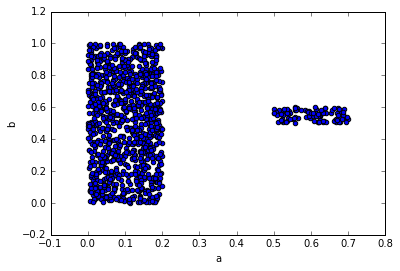

In [3]:
rect.plot.scatter(x='a', y='b')

In [4]:
kmeans = KMeans(n_clusters=2)

In [5]:
kmeans.fit(rect)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [6]:
labels = kmeans.predict(rect)

In [7]:
labels

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [8]:
rect.head()

,a,b
0,0.021123,0.031827
1,0.135825,0.419222
2,0.100619,0.773097
3,0.080728,0.377079
4,0.043456,0.803697


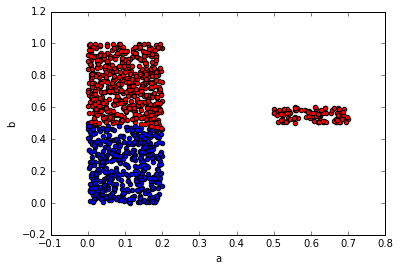

In [9]:
ax = rect.loc[labels== 0].plot.scatter(x='a', y='b')
rect.loc[labels== 1].plot.scatter(x='a', y='b', color='r', ax=ax)

In [10]:
from clusteror import Clusteror

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN 5005)


In [11]:
clusteror = Clusteror(rect)

In [12]:
clusteror.cleaned_data = np.tanh(rect - rect.median())

In [13]:
clusteror.train_da_dim_reducer()

In [14]:
clusteror.reduce_to_one_dim()

In [15]:
clusteror.train_kmeans(n_clusters=2)

In [16]:
clusteror.add_cluster()

In [17]:
clusteror.raw_data.head()

,a,b,cluster
0,0.021123,0.031827,0
1,0.135825,0.419222,0
2,0.100619,0.773097,1
3,0.080728,0.377079,0
4,0.043456,0.803697,1


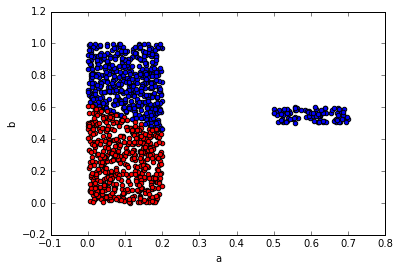

In [18]:
ax = clusteror.raw_data.loc[(clusteror.raw_data.cluster == 1).values].plot.scatter(x='a', y='b')
clusteror.raw_data.loc[(clusteror.raw_data.cluster == 0).values].plot.scatter(x='a', y='b', ax=ax, color='r')

In [19]:
clusteror.raw_data.cluster.value_counts()

1    596
0    504
Name: cluster, dtype: int64

In [20]:
from clusteror.plot import *

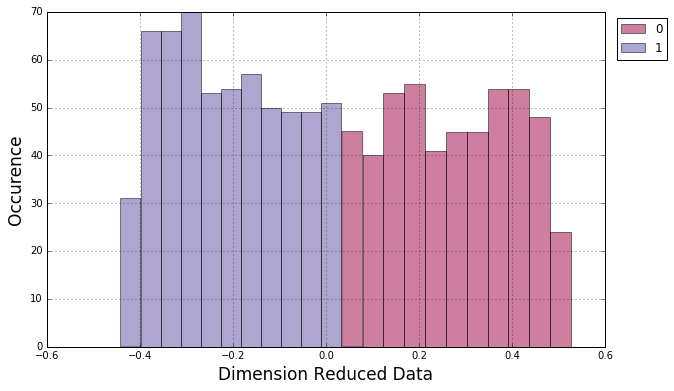

In [21]:
hist_plot_one_dim_group_data(clusteror.one_dim_data, clusteror.raw_data.cluster)

In [23]:
valley_clusteror = Clusteror(rect)

In [24]:
valley_clusteror.cleaned_data = np.tanh(rect.iloc[:, :2] - rect.iloc[:, :2].median())

In [25]:
valley_clusteror.train_sda_dim_reducer()

In [26]:
valley_clusteror.cleaned_data.head()

,a,b
0,-0.090516,-0.467712
1,0.023934,-0.119174
2,-0.011268,0.229945
3,-0.031149,-0.160487
4,-0.068324,0.258716


In [27]:
valley_clusteror.reduce_to_one_dim()

In [32]:
valley_clusteror.train_valley(bins=200, contrast=0.1)

In [33]:
valley_clusteror.add_cluster()

In [34]:
valley_clusteror.raw_data.cluster.value_counts()

1    1033
2      67
Name: cluster, dtype: int64

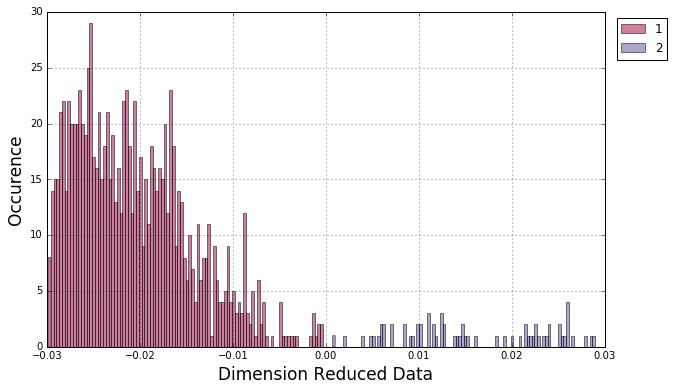

In [35]:
hist_plot_one_dim_group_data(valley_clusteror.one_dim_data, valley_clusteror.raw_data.cluster, bins=100)

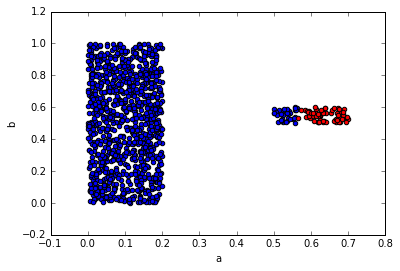

In [36]:
ax = valley_clusteror.raw_data.loc[(valley_clusteror.raw_data.cluster == 1).values].plot.scatter(x='a', y='b')
valley_clusteror.raw_data.loc[(valley_clusteror.raw_data.cluster == 2).values].plot.scatter(x='a', y='b', ax=ax, color='r')
#valley_clusteror.raw_data.loc[(valley_clusteror.raw_data.cluster == 3).values].plot.scatter(x='a', y='b', ax=ax, color='k')

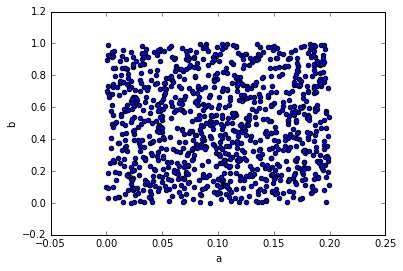

In [238]:
ax = valley_clusteror.raw_data.loc[(valley_clusteror.raw_data.cluster == 1).values].plot.scatter(x='a', y='b')